In [1]:
cd /home/ubuntu/FedEM/

/home/ubuntu/FedEM


In [14]:

from utils.utils import *
from utils.constants import *
from utils.args import *
from run_experiment import * 

from torch.utils.tensorboard import SummaryWriter

# Import General Libraries
import os
import argparse
import torch
import copy
import pickle
import random
import numpy as np
import pandas as pd
from models import *

# Import Transfer Attack
from transfer_attacks.Personalized_NN import *
from transfer_attacks.Params import *
from transfer_attacks.Transferer import *
from transfer_attacks.Args import *
from transfer_attacks.TA_utils import *

import numba 
import matplotlib


In [ ]:
plt.plot(np.cumsum(regret_worst_avg), label = 'Greedy Dist.', color = np.divide(palette.colors[2],255), linewidth=2.5)
y = np.cumsum(regret_worst_avg)
plt.fill_between(range(T), y-regret_worst_sd2, y+regret_worst_sd2,
                alpha=0.2, facecolor=np.divide(palette.colors[2],255), linewidth=1, antialiased=True)

plt.plot(np.cumsum(regret_rsv_avg), label = 'Edge-Alloc:D', color = np.divide(palette.colors[4],255), linewidth=2.5)
y = np.cumsum(regret_rsv_avg)
plt.fill_between(range(T), y-regret_rsv_sd2, y+regret_rsv_sd2,
                alpha=0.2, facecolor=np.divide(palette.colors[4],255), linewidth=1, antialiased=True)

plt.plot(np.cumsum(regret_cent_stat_avg), label = 'Stat. Central', color = np.divide(palette.colors[6],255), linewidth=2.5, linestyle='dashed')
y = np.cumsum(regret_cent_stat_avg)
plt.fill_between(range(T), y-regret_cent_stat_sd2, y+regret_cent_stat_sd2,
                alpha=0.2, facecolor=np.divide(palette.colors[6],255), linewidth=1, antialiased=True)


In [22]:
from palettable.cubehelix import Cubehelix
palette = Cubehelix.make(start=1, rotation=-0.5, n=8)
palette.colors
coloridx = [0, 2, 3, 4, 5]

Uw 0.5084583466326205
URsv 0.7845515480370252
UGoT 0.7239067985955953


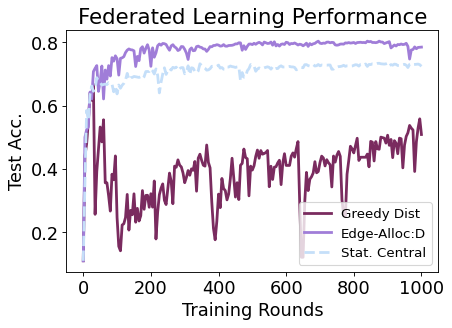

In [24]:
names = ['Uw', 'URsv', 'UGoT']
legend_name = ["Greedy Dist", "Edge-Alloc:D", "Stat. Central"]
colors = [np.divide(palette.colors[2],255), np.divide(palette.colors[4],255), np.divide(palette.colors[6],255)]
linestyles = ['solid','solid','dashed']

plt.figure(figsize=(6, 4), dpi=80)


for itt in range(len(names)):
    with open("weights/DisMEC/23_06_23_DistMEC_FL/" + names [itt] +"/train_log.p", "rb") as file:
        # Load the object from the pickle file
        obj = pickle.load(file)

    # Access the loaded object
    print(names[itt], obj["test_acc"][-1])
    plt.plot(obj["rounds"], obj["test_acc"], label = legend_name[itt], linewidth=2.5, color = colors[itt],
            linestyle = linestyles[itt])
    
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

# plt.xlabel('Categories')
plt.ylabel('Test Acc.')
plt.xlabel('Training Rounds')
plt.title('Federated Learning Performance')
plt.legend(loc = 'best', prop={'size': 12})
